## Machine Learning Project: Fitness Calorie Prediction

This project aims to develop a machine learning solution to predict the calorie burn category of a workout session. 
We will identify the problem suitable for machine learning, perform exploratory data analysis (EDA), 
implement models using scikit-learn, and evaluate them.

#### Objectives
1. Identify problems suitable for ML.
2. Perform EDA.
3. Apply ML concepts using Python (scikit-learn).
4. Evaluate and tune models.


In [11]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Set the aesthetic style of the plots
sns.set(style='whitegrid')


In [12]:
# Load the dataset
file_path = 'Final_data.csv'
df = pd.read_csv(file_path)
# Display the first 5 rows to understand the data structure and verify loading
display(df.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260000e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020000e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.080000e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.990000e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.260000e+19,Low


#### Exploratory Data Analysis (EDA)
1. Understand the data structure (shape, data types).
2. Check for missing values and duplicates.
3. Identify the target variable and problem type.
4. Visualize distributions and relationships.

In [13]:
# Check the dimensions of the dataset
print(f"Dataset Shape: {df.shape}")

# Inspect data types and non-null counts to identify potential data quality issues
print("\nData Info:")
df.info()

# Display summary statistics for numerical columns to understand distributions
print("\nStatistical Summary:")
display(df.describe())

Dataset Shape: (20000, 54)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float6

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109601,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631758e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197738e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.490000e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.440000e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.370000e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100000e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.760000e+20


In [14]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If duplicates exist, they should generally be removed to prevent bias
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Missing Values by Column:
Series([], dtype: int64)

Number of duplicate rows: 0


#### Problem Identification
Need to identify the target column. 
The dataset contains 'Calls_Burned' (continuous) and 'Burns_Calories_Bin' (categorical).
Predicting the exact calories is a Regression task.
Predicting the calorie category (Low, High) is a Classification task.

For this project, 'Burns_Calories_Bin' as target variable, making this a Classification problem.
This is suitable for a user-facing application where a user might want to know if a workout intensity is High or Low.

Target Variable: Burns_Calories_Bin
Unique Categories: ['Medium' 'High' 'Low' 'Very High']


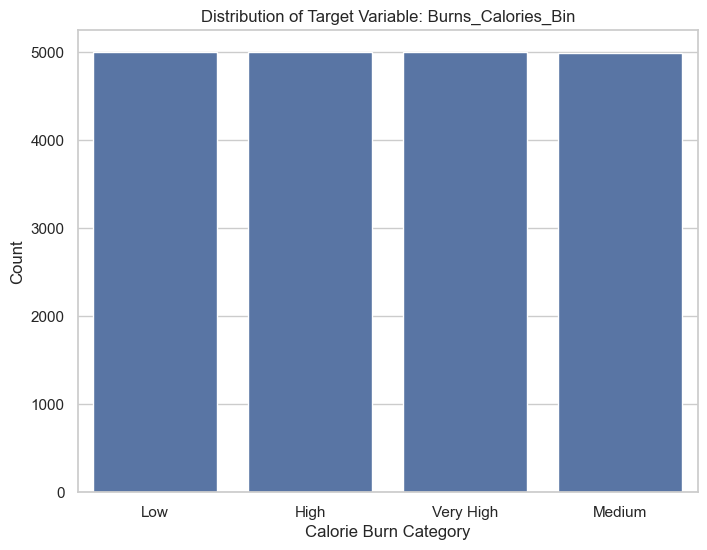

Class Counts:
Burns_Calories_Bin
Low          5003
High         5000
Very High    5000
Medium       4997
Name: count, dtype: int64


In [15]:
# Define the target variable
target_column = 'Burns_Calories_Bin'

# Verify the unique values to confirm it is categorical
print(f"Target Variable: {target_column}")
print(f"Unique Categories: {df[target_column].unique()}")

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df, order=df[target_column].value_counts().index)
plt.title(f'Distribution of Target Variable: {target_column}')
plt.xlabel('Calorie Burn Category')
plt.ylabel('Count')
plt.show()

# Check for class imbalance
print("Class Counts:")
print(df[target_column].value_counts())

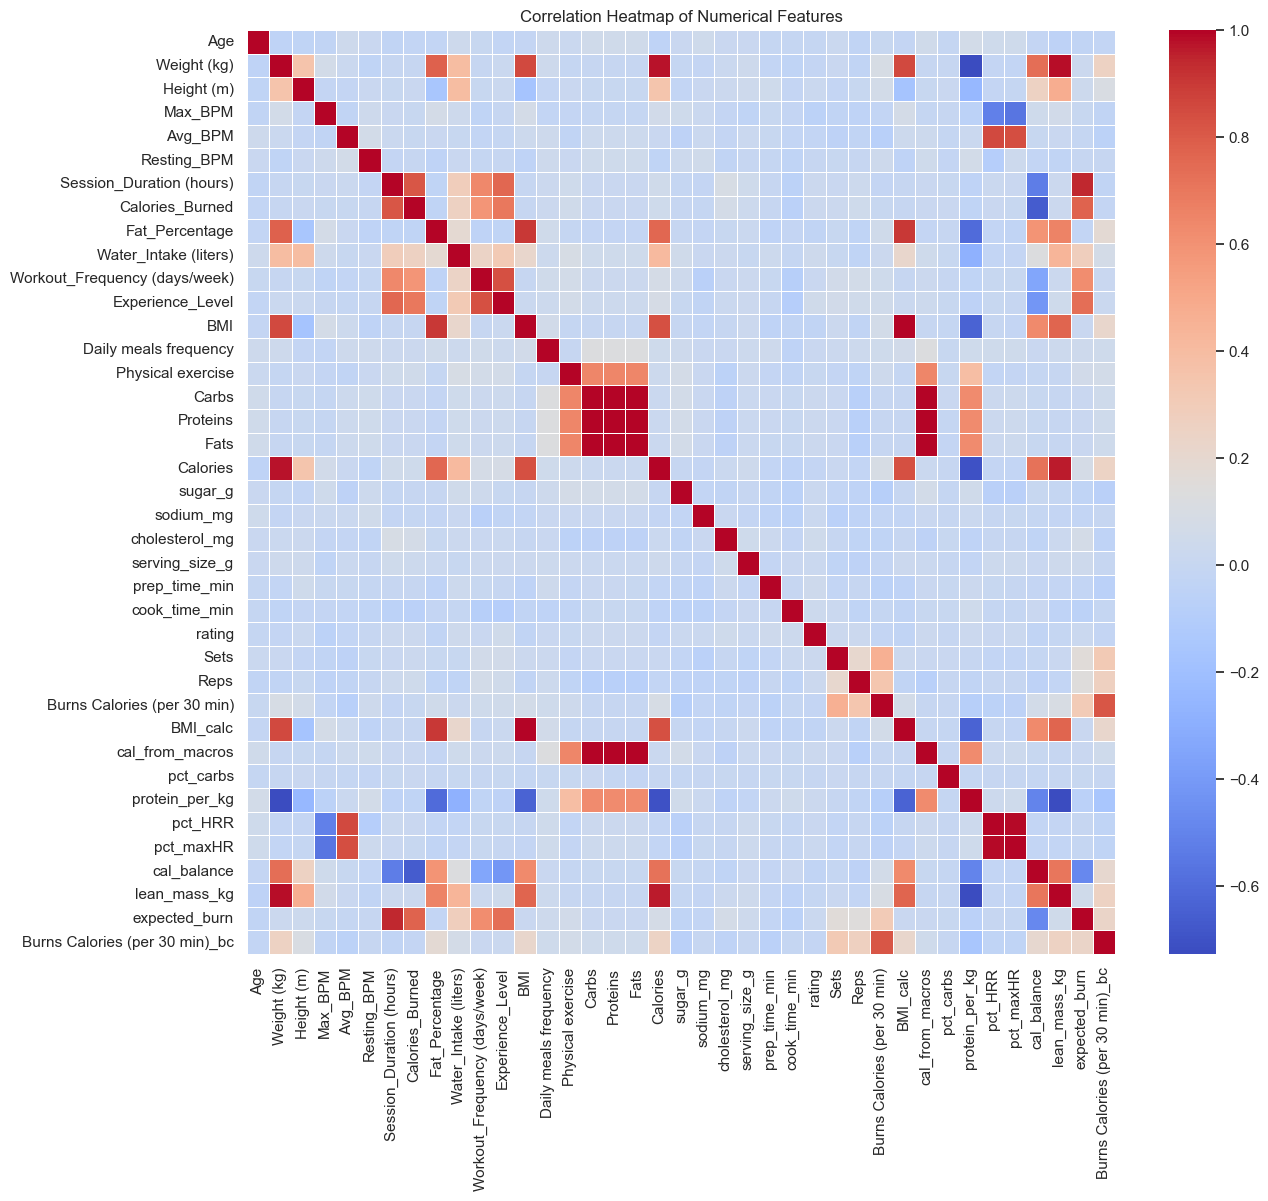

In [16]:
# Visualize relationships between numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Plotting the heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

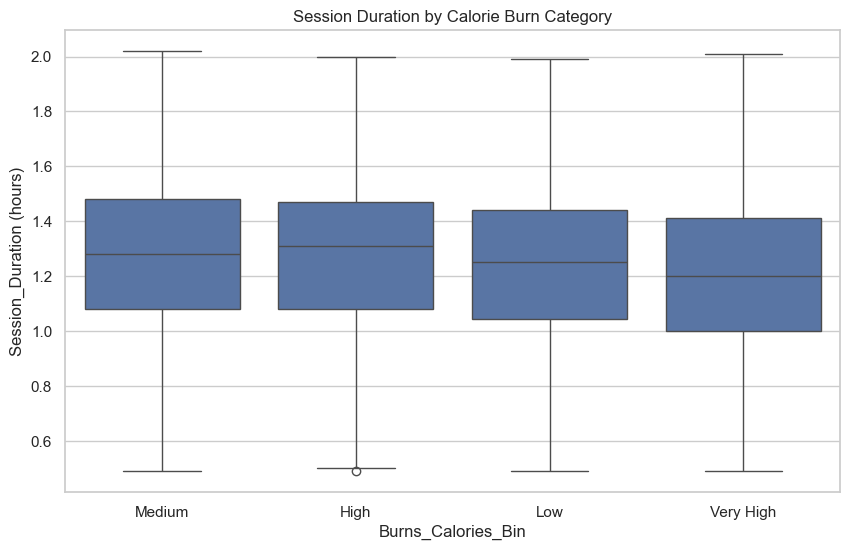

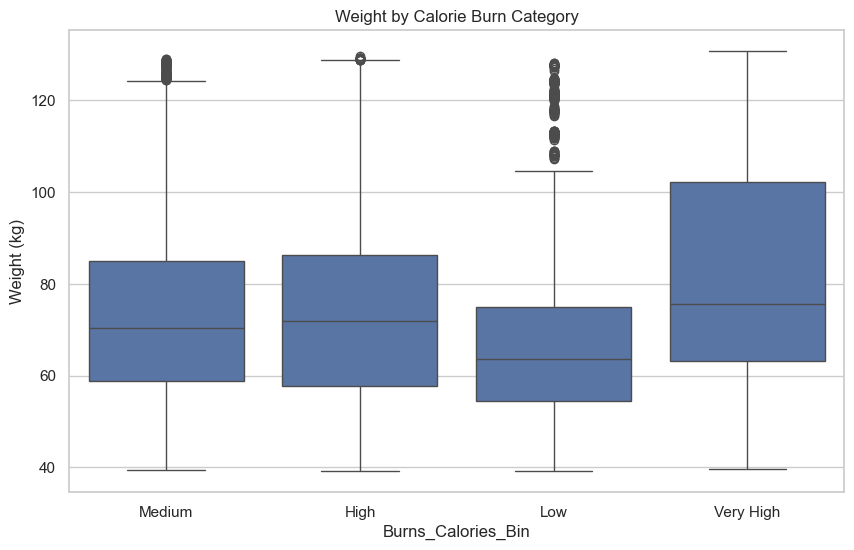

In [17]:
# Analyze relationship between a key feature and the target
# Session Duration vs Calorie Bin
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_column, y='Session_Duration (hours)', data=df)
plt.title('Session Duration by Calorie Burn Category')
plt.show()

# Weight vs Calorie Bin
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_column, y='Weight (kg)', data=df)
plt.title('Weight by Calorie Burn Category')
plt.show()

In [18]:
# 1. Feature Selection and Preprocessing
# Dropping columns identified as leakage or redundant
leakage_cols = ['Calories_Burned', 'expected_burn', 'Burns Calories (per 30 min)', 
                'Burns Calories (per 30 min)_bc', 'cal_balance', 'cal_from_macros']
redundant_cols = ['Name of Exercise', 'meal_name', 'Benefit', 'Workout', 'BMI_calc']
cols_to_drop = leakage_cols + redundant_cols

# Define X (features) and y (target)
X = df.drop(columns=cols_to_drop + ['Burns_Calories_Bin'], errors='ignore')
y = df['Burns_Calories_Bin']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Features selected: {X.shape[1]}")
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Create Preprocessing Pipeline
# Numeric: Impute + Scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: Impute + OneHotEncode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 2. Train-Test Split (80/20, Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split completed.")

Features selected: 42
Categorical columns: ['Gender', 'Workout_Type', 'meal_type', 'diet_type', 'cooking_method', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle']
Numerical columns: ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'lean_mass_kg']
Data split completed.


In [19]:
# 3. Model Training and Hyperparameter Tuning
# Define Base Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and Compare Base Models
best_model_name = None
best_score = 0

print("Training Base Models...")
for name, model in models.items():
    # Create pipeline with preprocessor and model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_model_name = name

print(f"Best base model found: {best_model_name}")

# Hyperparameter Tuning for Random Forest (Selected for further optimization)
print("\nStarting Hyperparameter Tuning for Random Forest...")

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Param Grid (Max 3 values per hyperparameter as requested)
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, 
                                   n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='accuracy')

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")

final_model = random_search.best_estimator_

Training Base Models...
Logistic Regression Accuracy: 0.4052
Random Forest Accuracy: 0.9593
Best base model found: Random Forest

Starting Hyperparameter Tuning for Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Best Cross-Validation Score: 0.9589



Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.95      0.95      1000
         Low       0.96      0.96      0.96      1001
      Medium       0.94      0.94      0.94       999
   Very High       0.98      0.97      0.98      1000

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



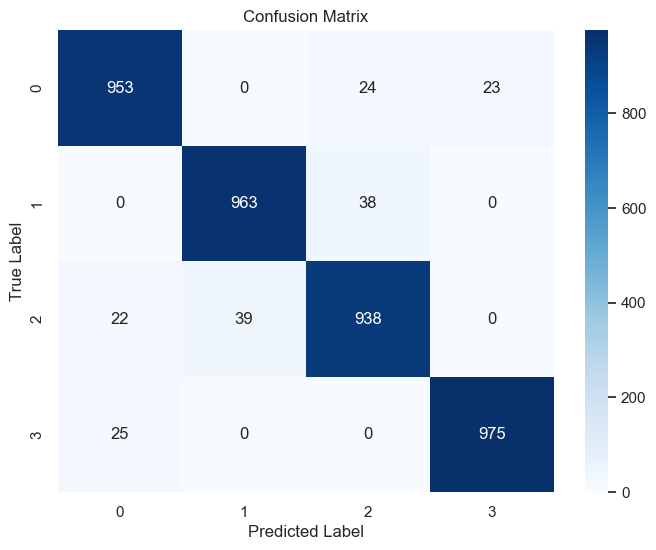

Model saved to burns_calories_model.pkl


In [20]:
# 4. Final Evaluation

y_pred = final_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5. Save Model
model_filename = 'burns_calories_model.pkl'
joblib.dump(final_model, model_filename)
print(f"Model saved to {model_filename}")